# Maximum Independent Set
Exploring some of the stuff in 
Kim, Minhyuk, Kangheun Kim, Jaeyong Hwang, Eun-Gook Moon, and Jaewook Ahn. 2022. "Rydberg Quantum Wires for Maximum Independent Set Problems." _Nature Physics_ 18 (7): 755-59. [doi](https://doi.org/10.1038/s41567-022-01629-5)

In [1]:
import numpy as np
import pulser
from pulser.devices import DigitalAnalogDevice, MockDevice
from pulser.register import Register
from pulser.pulse import Pulse
from pulser.waveforms import BlackmanWaveform
import networkx as nx
import matplotlib.pyplot as plt

from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

from source.qubo import anneal, plot_distribution, draw_solutions

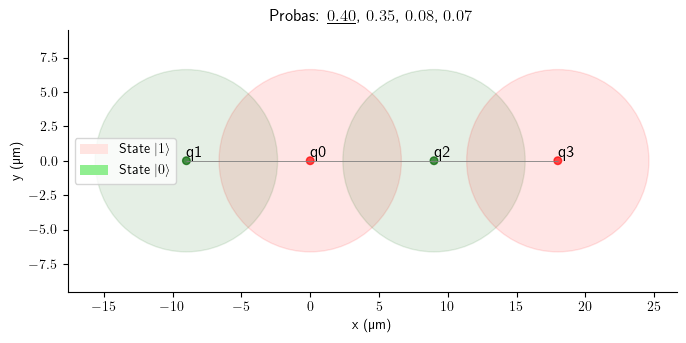

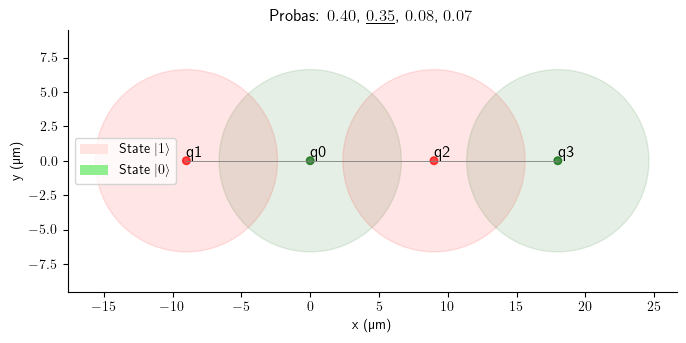

In [2]:
from matplotlib.patches import Patch
from matplotlib import rc

rc('text', usetex=True)

coords = [
    [-0, 0], 
    [-9, 0], 
    [9, 0],
    [18, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 2
delta_i = -1
T = 5000
counts:dict = anneal(reg, Omega, delta_i, draw=False, T=T) # dict of counts
draw_solutions(reg, counts, n=2, draw_graph=True)

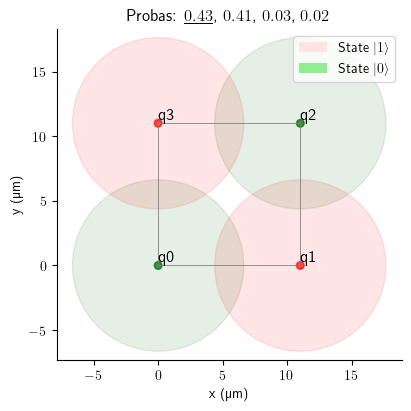

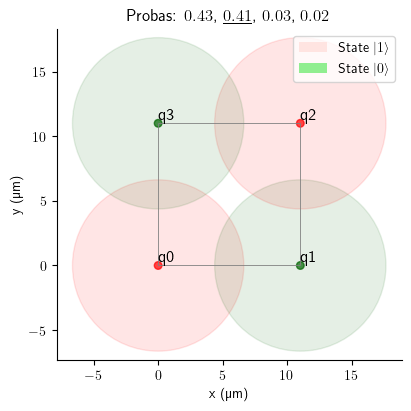

In [3]:
coords = [
    [-0, 0], 
    [11, 0], 
    [11, 11],
    [0, 11], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
draw_solutions(reg, counts, n=2, draw_graph=True)

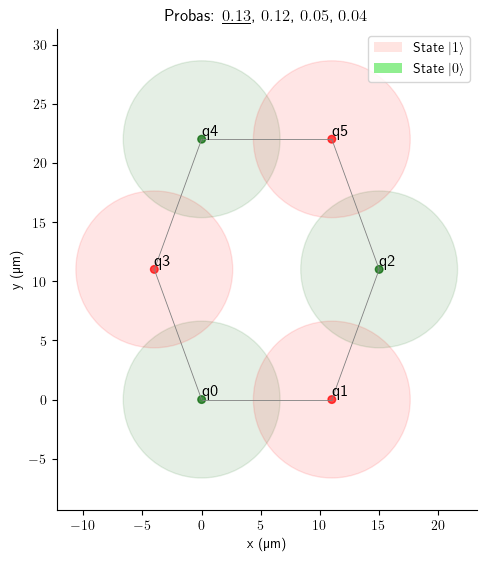

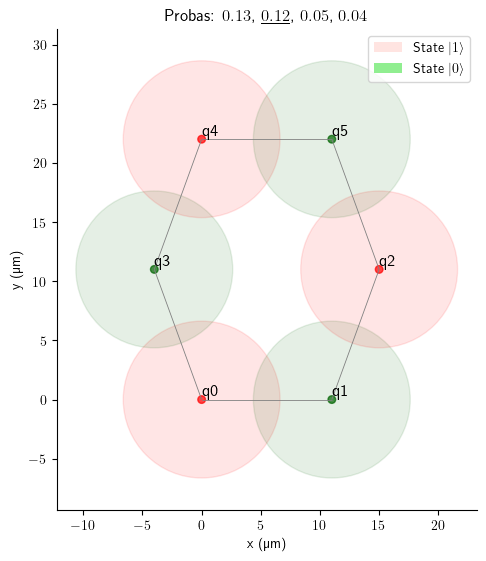

In [4]:
coords = [
    [-0, 0], 
    [11, 0], 
    [15, 11],
    [-4, 11], 
    [-0, 22], 
    [11, 22], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
draw_solutions(reg, counts, n=2, draw_graph=True)

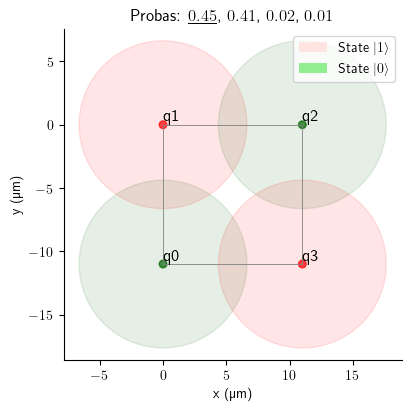

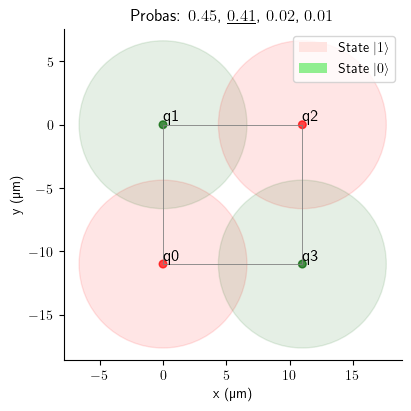

In [5]:
coords = [[-0, -11], [-0, 0], [11, 0], [11, -11]]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
draw_solutions(reg, counts, n=2, draw_graph=True)

# Quantum Wire
Here we connect q1 and q3 through a wire. In 2D, otherwise there is no way of connecting both

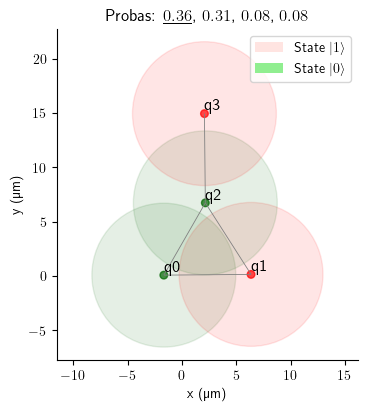

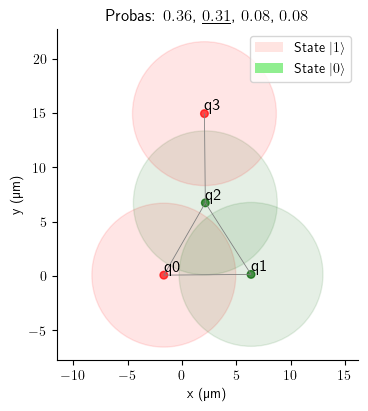

In [6]:
qubits = {
  "q0": (-1.6666664123535155, 0.0666656494140625),
  "q1": (6.366546024142858, 0.13553528612314714),
  "q2": (2.155397489224712, 6.724032097660272),
  "q3": (2.0729086582155096, 14.940739367135642),
}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T, device=MockDevice)
draw_solutions(reg, counts, n=2, device=MockDevice, draw_graph=True)

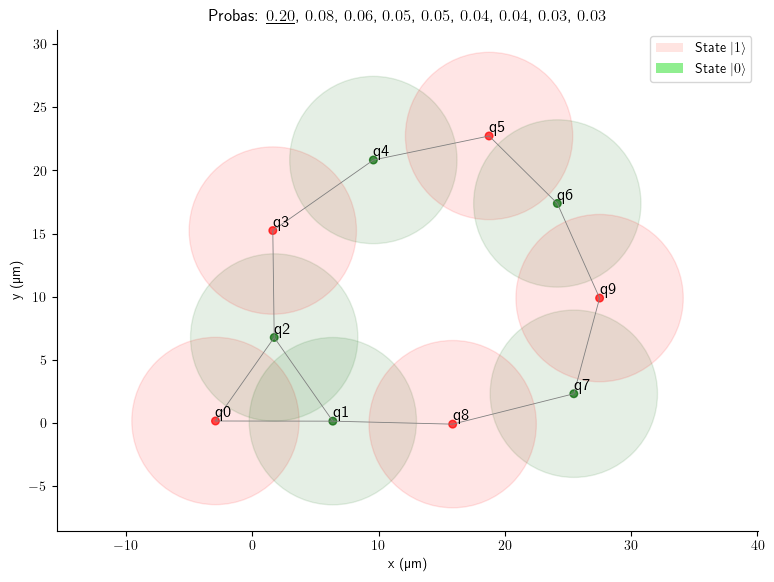

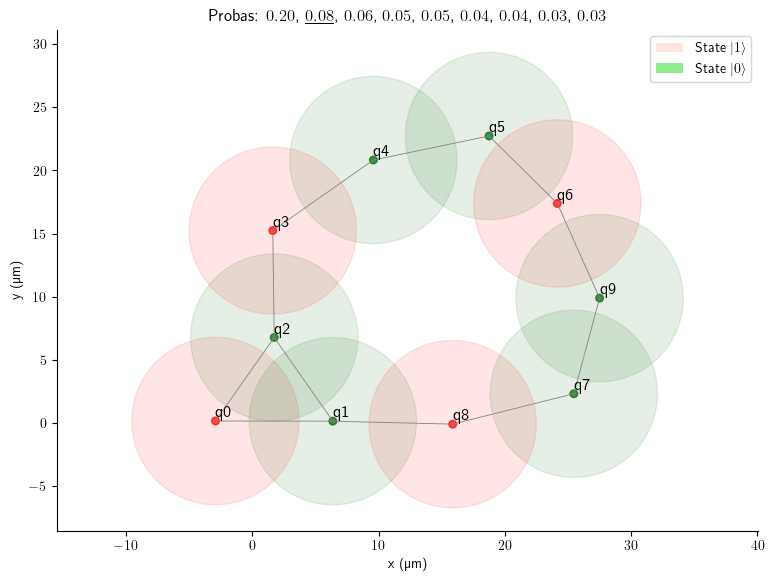

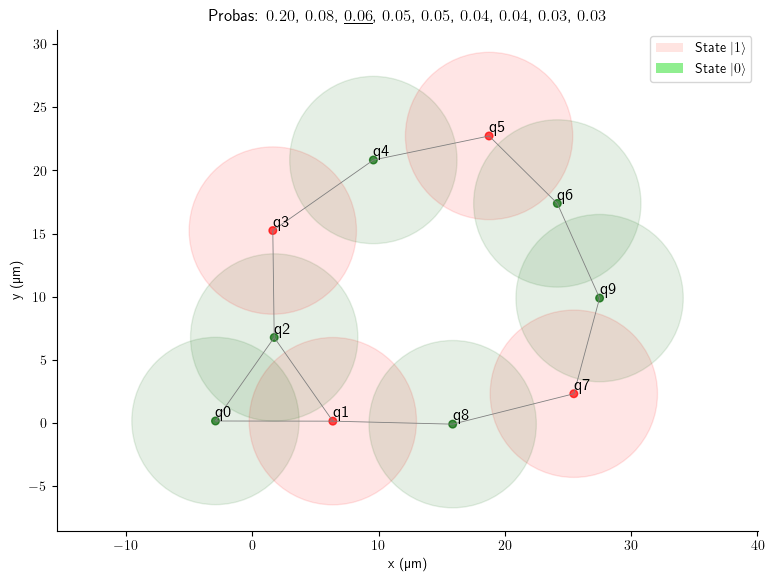

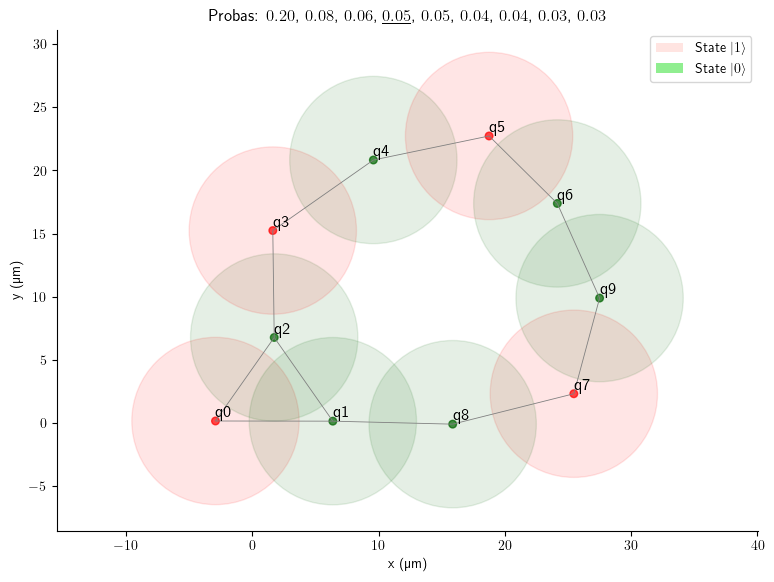

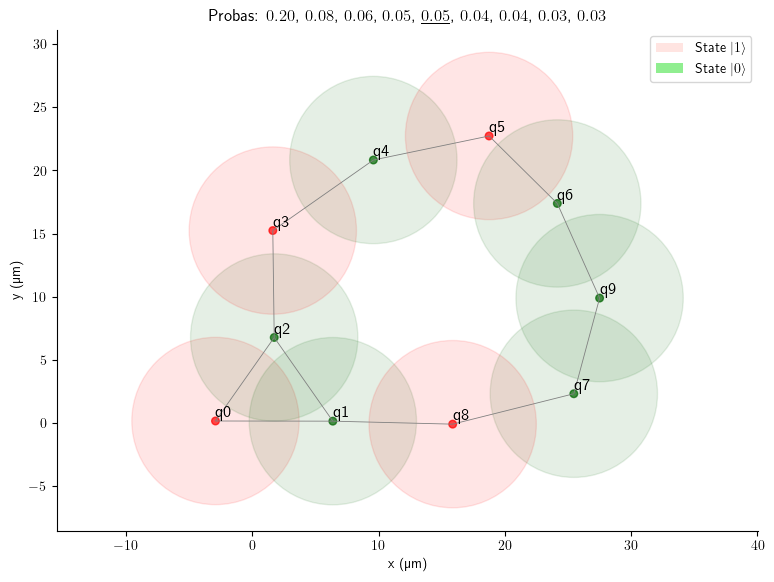

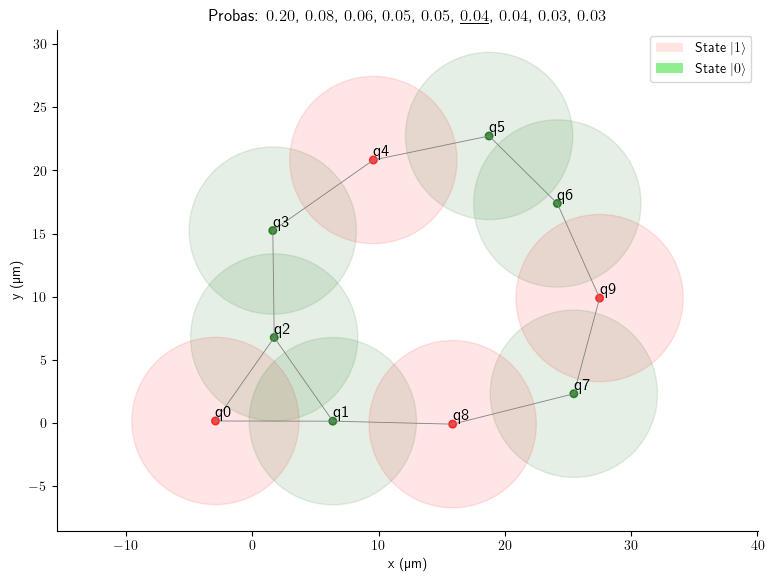

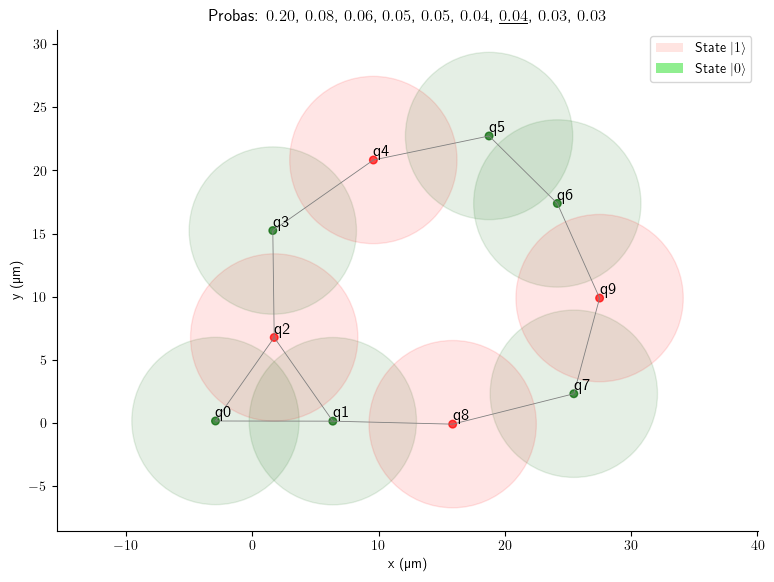

In [25]:
qubits = {
  "q0": (-2.929187634754878, 0.14934996797139832),
  "q1": (6.366546024142858, 0.13553528612314714),
  "q2": (1.7233173448666026, 6.764781926054275),
  "q3": (1.611790828019069, 15.234176939660493),
  "q4": (9.577530043967045, 20.821758660518395),
  "q5": (18.742539207142713, 22.725681713526175),
  "q6": (24.14798655516573, 17.380116710977585),
  "q7": (25.457090547014126, 2.3066870891348126),
  "q8": (15.859517277017963, -0.10074512054619467),
  "q9": (27.4975613836455, 9.884109794661166),
}
reg = Register(qubits)

Omega = 4
delta_i = -4
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T, device=MockDevice)
draw_solutions(reg, counts, n=7, device=MockDevice, draw_graph=True)

We want the star graph. Not possible without wires.

Somehow I have to turn the $\delta_i$ rather high here.o

The point is that in the figure below, we want to build a, but b also connects all the vertices on the outside. c fixes this.
The solution is [0111111], so all except the middle vertex.

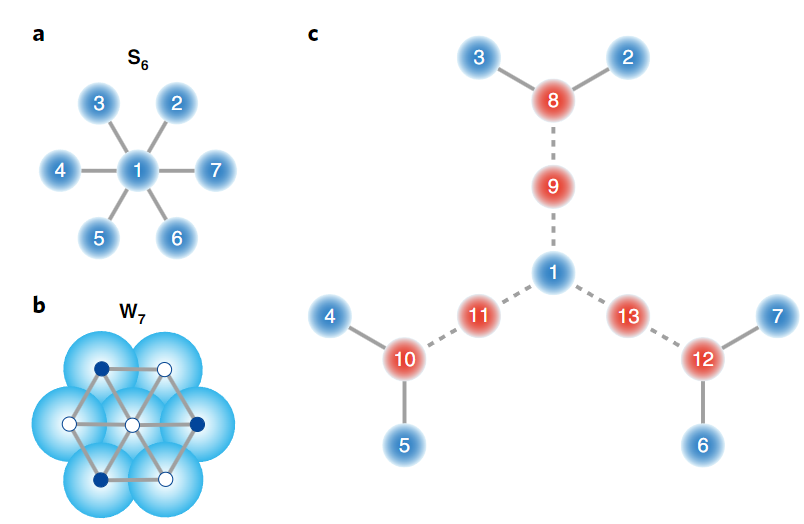

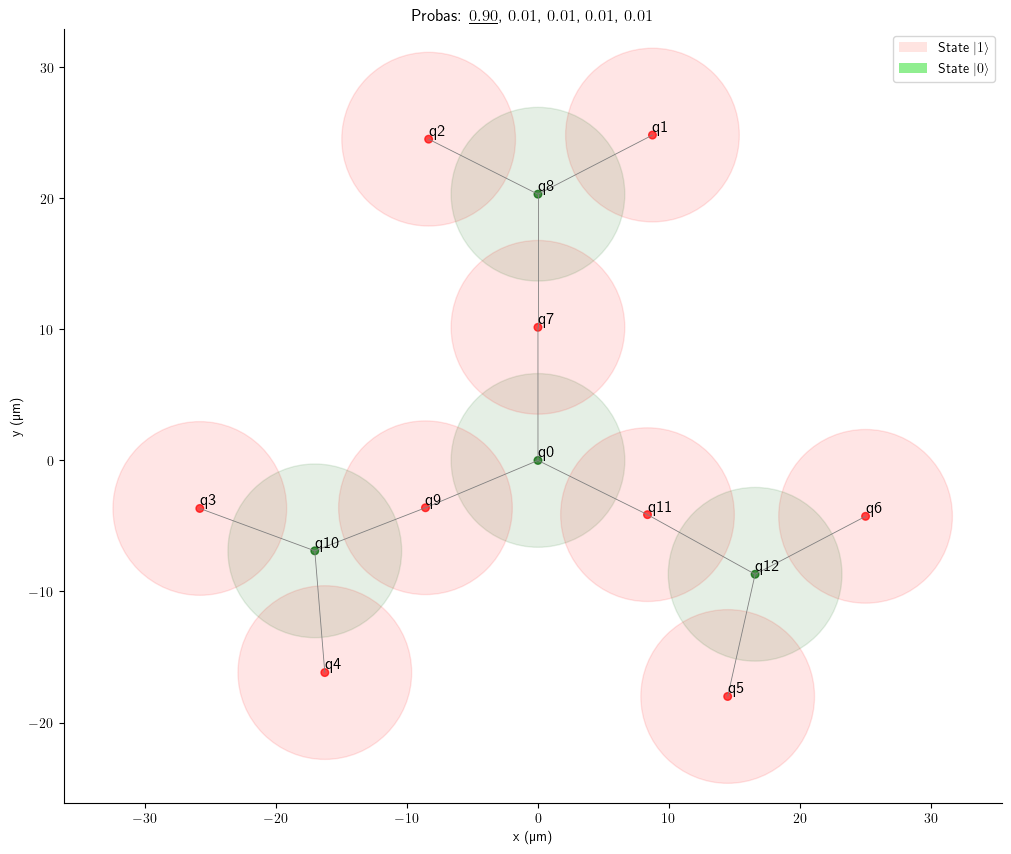

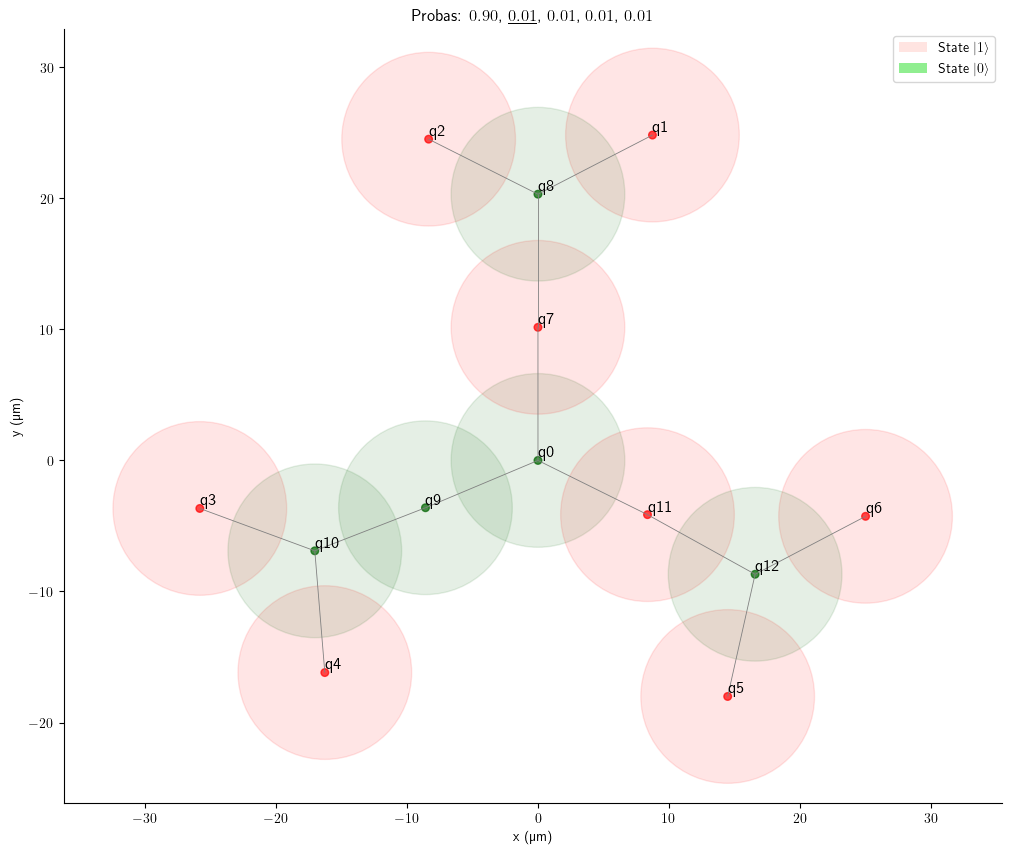

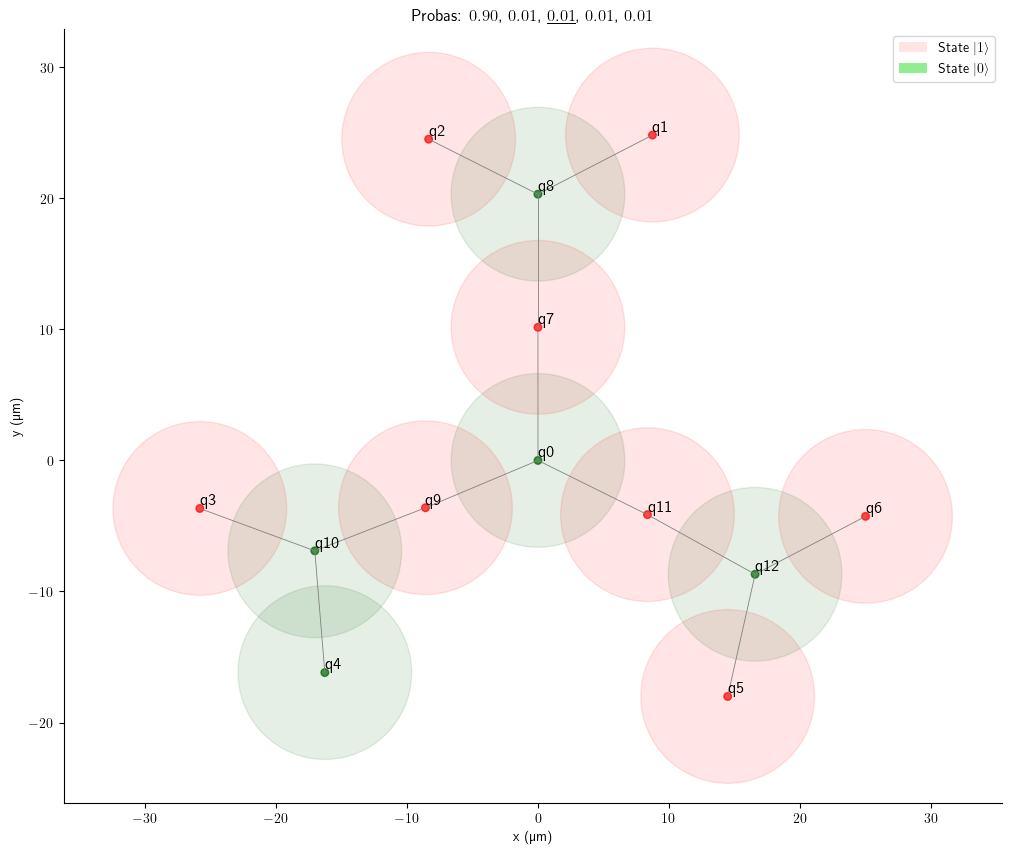

In [21]:

qubits = {
  "q0": (0, 0),
  "q1": (8.735617163072948, 24.827028293947173),
  "q2": (-8.342495165204053, 24.51335255897444),
  "q3": (-25.80389339286783, -3.664247050218374),
  "q4": (-16.26459024904507, -16.18735363376267),
  "q5": (14.476242806075025, -18.010818773220524),
  "q6": (24.997440014509888, -4.264796493670645),
  "q7": (-0.0014645830325186182, 10.157557980311985),
  "q8": (-0.0014645830325186182, 20.31511596062397),
  "q9": (-8.584718756353446, -3.610310331307195),
  "q10": (-17.029355531229335, -6.897539807332539),
  "q11": (8.357497754864577, -4.137473403197489),
  "q12": (16.56884517447057, -8.686198085183772),
}
reg = Register(qubits)

Omega = 4
delta_i = -4
T = 8000
counts = anneal(reg, Omega, delta_i, draw=False, T=T, device=MockDevice)
draw_solutions(reg, counts, n=3, device=MockDevice, draw_graph=True)